                                
# **BER VS SNR : PLOT AND CHANGE SNR FOR BER :**


For SNRdb of 2
This is the signal_power: 1.5848931924611136e-08
This is the attenuation 1.2589254117941673
This is the noise 0.00026464849182344366
This is the attenuated signal 0.0
This is the threshold 6.666666666666667e-05
This is the received signal 0.00026464849182344366
This is the BER 4.010217999999999838323105905147e-01
The actual SNR linear is 1.5848931924611136

For SNRdb of 4
This is the signal_power: 2.51188643150958e-08
This is the attenuation 1.5848931924611136
This is the noise 0.00018049467038546403
This is the attenuated signal 0.0
This is the threshold 6.666666666666667e-05
This is the received signal 0.00018049467038546403
This is the BER 3.457806999999999963968377869605e-01
The actual SNR linear is 2.51188643150958

For SNRdb of 6
This is the signal_power: 3.981071705534972e-08
This is the attenuation 1.9952623149688795
This is the noise 6.91050817355103e-05
This is the attenuated signal 0.0
This is the threshold 6.666666666666667e-05
This is the received signal 6.

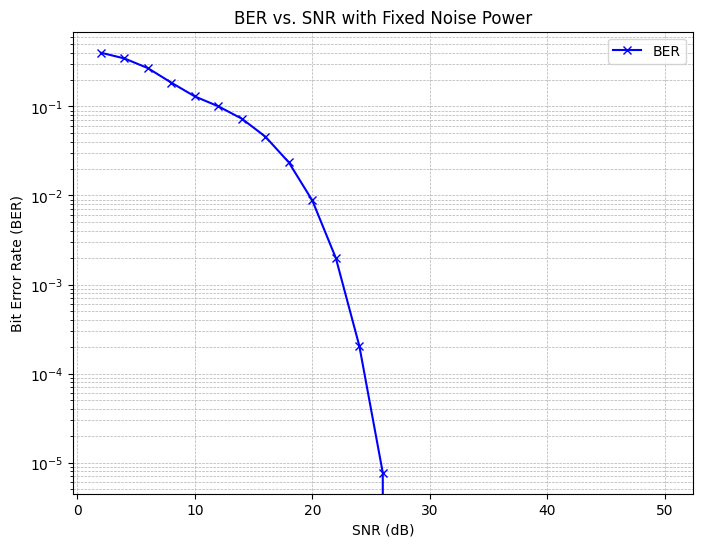

In [2]:
#########################################################################################
# Version 0.3
#
# Fabrizzio Arguello
# Date:02/12/2025
#
# Description: Checks N bits error from signal transmission
#
#########################################################################################

#Libraries Used
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import openpyxl as xl

# Constants
BIT_AMOUNT = 10000000  # Increased bit count for better accuracy
SIG_POWER = 10 ** -8# Signal power (can be changed independently)
NOISE_POWER = 10 ** -7  # Fixed noise power (does not change with SNR)
SNR_RANGE = np.arange(2, 51, 2)  # Increased SNR range
TRIALS = 1  # Number of trials per SNR

# Lists to store BER results
error_rate = []
signal_power_list = []
noise_power_list = []
attenuation_list = []
attenuated_signal_list = []
threshold_list = []
received_signal_list = []
SNR_linear_list = []

data_dict = {
    "SNR (dB)": SNR_RANGE,
    "SNR Linear": SNR_linear_list,
    "BER": error_rate,
    "Signal Power": signal_power_list,
    "Noise Power": noise_power_list,
    "Attenuation": attenuation_list,
    "Attenuated Signal": attenuated_signal_list,
    "Threshold": threshold_list,
    "Received Signal": received_signal_list
}

# Simulate BER for each SNR
for snr_db in SNR_RANGE:
    total_errors = 0

    for _ in range(TRIALS):

        bits = np.random.randint(0, 2, BIT_AMOUNT)  # Generate random bit sequence

        # Convert SNR from dB to linear scale
        snr_linear = 10 ** (snr_db / 10)

        # Set fixed noise variance
        noise_var = NOISE_POWER/snr_linear

        # Adjust only signal power to control SNR
        signal_power = SIG_POWER * snr_linear
        print(f"\nFor SNRdb of {snr_db}\nThis is the signal_power: {signal_power}")

        voltage = np.sqrt(SIG_POWER)  # Signal voltage
        threshold = voltage / 1.5  # Decision threshold

        # Channel gain (still modeled as √SNR)
        channel = np.sqrt(snr_linear)
        #channel = np.sqrt(1)
        print(f"This is the attenuation {channel}")

        # Generate noise (Gaussian with fixed variance)
        noise = np.random.normal(0, np.sqrt(noise_var), BIT_AMOUNT)
        #noise = (snr_linear/snr_db)*NOISE_POWER
        print(f"This is the noise {noise[snr_db]}")

        t_sig = bits * voltage #original transmitted signal

        att_sig = channel * t_sig #attenuated signal
        print(f"This is the attenuated signal {att_sig[snr_db]}")

        # Received signal
        r_sig = att_sig + noise #attentuated signal plus the noise
        print(f"This is the threshold {threshold}")
        print(f"This is the received signal {r_sig[snr_db]}")

        decoded_bits = []
        error_cnt = 0

        for i in range (BIT_AMOUNT):
            if r_sig[i] >= threshold:
                decoded_bits.append(int(1))  # add 1 to the list if bigger than threshold
            else:
                decoded_bits.append(int(0))  # add  to the list if lesser than threshold

            if decoded_bits[i] != bits[i]:
                error_cnt += 1  # count the error of decoded bits that don't match bit stream

        # Compute BER
        ber = error_cnt / BIT_AMOUNT
        print(f"This is the BER {ber:.30e}")
        print(f"The actual SNR linear is {snr_linear}")

        error_rate.append(ber)
        signal_power_list.append(signal_power)
        noise_power_list.append(noise[snr_db])
        attenuation_list.append(channel)
        attenuated_signal_list.append(att_sig[snr_db])
        threshold_list.append(threshold)
        received_signal_list.append(r_sig[snr_db])
        SNR_linear_list.append(snr_linear)


# Convert to Pandas DataFrame
df = pd.DataFrame(data_dict)

# Save DataFrame to Excel
df.to_excel("BER_vs_SNR_results.xlsx", index=False)
print(f"Data saved successfully")

# Plot BER vs. SNR
plt.figure(figsize=(8, 6))
plt.semilogy(SNR_RANGE, error_rate, marker='x', linestyle='-', color='b', label="BER")
plt.xlabel('SNR (dB)')
plt.ylabel('Bit Error Rate (BER)')
plt.title('BER vs. SNR with Fixed Noise Power')
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.legend()
plt.show()
